# Advanced Numerical Methods for Data Science

### 1st Assignment (2021-2022)

### Jingye Qian (100384773)

Generate random data from a predefined linear regression model. In particular, consider that $0 \leq \beta_i \leq 5$ $i = 0, \dots, K$ are integer with at least $K = 1000$ independent variables $X = (X_1, X_3,\ldots,X_K)$ and $n = 5000$ observations. We seek to adjust a multiple linear regression model to explain variable $Y$ as a function of the other variables $X$,i.e., $(Y = \beta^{'}X + \epsilon)$ by using “Ridge Regression” under a least-squares approach:

$$\min_{\beta} \quad \left \| y-X\beta \right\|_2^2 + \rho \left \|\beta \right\|_2^2$$

where $\rho$ is a parameter of your election (for instance consider $\rho= 5$).


In [2]:
# installation
!pip install numpy
!pip install scipy

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [7]:
# importing
import matplotlib.pyplot as plt
import numpy as np

In [8]:
np.random.seed(1234)
# const
K = 1000 # the dimension of X
N = 50000 # the size of dataset
# create random dataset
X0_s = np.ones([N,1]) # the first column has all values equal to one for the coefficients of beta_0
X1_s = np.random.uniform(0,1,([N,K]))
X = np.concatenate([X0_s, X1_s],axis=1)
beta = np.random.randint(0,5,size=K+1)
## Values for the normal errors

error_s = np.random.normal(0,1,N)

## Values for the y's

Y = np.dot(X,beta) + error_s
rho = 5

# a) 

Estimate the value of the regression coefficients by implementing the analytical solution. Use this solution as a benchmark for the following sections.

In order to solve the following objective function:
$$
\begin{align*}
  \text{minimize}_\beta \quad & \|y-X\beta\|_2^2 + \rho \| \beta \|_2^2
\end{align*}
$$

we can derive its explicit solution $\beta_{ls}=(X^T X + \rho)^{-1}X^T y$


In [9]:
from numpy.linalg import inv
beta_ridge_exact = inv(X.T @ X + rho * np.identity(K+1)) @ X.T @ Y

# b)
Estimate the value of the regression coefficients by using the function minimize from the Python module **Scipy.optimize**. Try at least four available solvers and compare their performance in terms of number of iterations, number of function, gradient and hessian evaluations as well as total computational time.

In [10]:
from scipy.optimize import minimize
from scipy.optimize import Bounds
import time

def rigid_reg(beta_ls, X, Y, rho):
    z = Y - X @ beta_ls
    return np.dot(z,z) + rho * np.dot(beta_ls, beta_ls)

### i. L-BFGS-B Method

In [16]:
beta0 = np.zeros(K+1)
start_time = time.process_time()
res = minimize(rigid_reg, beta0, args=(X, Y, rho),  method='L-BFGS-B', options={'disp': True, 'maxiter': 200})
end_time = time.process_time()
print('Training time: %f s' %(end_time - start_time))
print(res)
err_val_1 = np.linalg.norm(beta_ridge_exact.T-res.x,ord=2)/np.linalg.norm(beta_ridge_exact.T,ord=2)
print('\nError in values of coefficients = %8.4f' %err_val_1)

Training time: 1829.734375 s
      fun: 224518.10416348706
 hess_inv: <1001x1001 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 934.39594479,  161.55245246,   64.80841005, ...,  757.84337229,
       1446.87365689,  666.43988653])
  message: 'STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT'
     nfev: 15030
      nit: 11
     njev: 15
   status: 1
  success: False
        x: array([ 4.04683662, -0.01735821,  1.97087143, ...,  0.02721431,
        3.1254334 ,  3.97610364])

Error in values of coefficients =   0.0777


##### Outputs
Current function value: 79579.8979

Iterations: 11

Function evaluations: 15030

Gradient evaluations: 15

Hessian evaluations: 0

Training time: 1829.734375 s

Error in values of coefficients =   0.0777

### ii. Scalar function of one or more variables using Sequential Least Squares Programming (SLSQP)

In [16]:
beta0 = np.zeros(K+1)
start_time = time.process_time()
res = minimize(rigid_reg, beta0, args=(X, Y, rho),  method='SLSQP', options={'disp': True, 'maxiter': 200})
end_time = time.process_time()
print('Training time: %f s' %(end_time - start_time))
print('(This is a processing time which can be larger than actually wall time when using multiple cores)')
print(res)
err_val_1 = np.linalg.norm(beta_ridge_exact.T-res.x,ord=2)/np.linalg.norm(beta_ridge_exact.T,ord=2)
print('\nError in values of coefficients = %8.4f' %err_val_1)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 79579.89790269443
            Iterations: 19
            Function evaluations: 19115
            Gradient evaluations: 19
Training time: 763.696749 s
(This is a processing time which can be larger than actually wall time when using multiple cores)
     fun: 79579.89790269443
     jac: array([0.07324219, 0.02148438, 0.04101562, ..., 0.0078125 , 0.04003906,
       0.05078125])
 message: 'Optimization terminated successfully'
    nfev: 19115
     nit: 19
    njev: 19
  status: 0
 success: True
       x: array([ 3.36452838, -0.0134765 ,  1.9753466 , ...,  0.00517557,
        3.00802566,  3.99427977])

Error in values of coefficients =   0.0000


##### Outputs
Current function value: 79579.8979

Iterations: 19

Function evaluations: 19115

Gradient evaluations: 19

Hessian evaluations: 0

Training time: 763.696749 s

Error in values of coefficients =   0.0000

### iii. trust-constr algorithm

In [12]:
beta0 = np.zeros(K+1)
start_time = time.process_time()
res = minimize(rigid_reg, beta0, args=(X, Y, rho),  method='trust-constr', options={'disp': True,'maxiter': 30})
end_time = time.process_time()
print('Training time: %f s' %(end_time - start_time))
print('(This is a processing time which can be larger than actually wall time when using multiple cores)')
err_val_1 = np.linalg.norm(beta_ridge_exact.T-res.x,ord=2)/np.linalg.norm(beta_ridge_exact.T,ord=2)
print('\nError in values of coefficients = %8.4f' %err_val_1)
print(res)

The maximum number of function evaluations is exceeded.
Number of iterations: 30, function evaluations: 30060, CG iterations: 118, optimality: 8.47e+02, constraint violation: 0.00e+00, execution time: 6.3e+02 s.
Training time: 3811.734375 s
(This is a processing time which can be larger than actually wall time when using multiple cores)

Error in values of coefficients =   0.0089
         cg_niter: 118
     cg_stop_cond: 4
           constr: []
      constr_nfev: []
      constr_nhev: []
      constr_njev: []
   constr_penalty: 1.0
 constr_violation: 0
   execution_time: 628.1108419895172
              fun: 79710.78893295207
             grad: array([-847.03004503, -458.18164062, -428.14804378, ..., -426.11914062,
       -410.95822029, -475.22103822])
              jac: []
  lagrangian_grad: array([-847.03004503, -458.18164062, -428.14804378, ..., -426.11914062,
       -410.95822029, -475.22103822])
          message: 'The maximum number of function evaluations is exceeded.'
          

##### Outputs
Current function value: 79710.78893295207

Iterations: 30

Function evaluations: 30060

Gradient evaluations: 30

Hessian evaluations: 0

Training time: 3811.734375 s

Error in values of coefficients =   0.0089

In [13]:
beta0 = np.zeros(K+1)
start_time = time.process_time()
res = minimize(rigid_reg, beta0, args=(X, Y, rho),  method='COBYLA', options={'disp': True, 'maxiter': 3000})
end_time = time.process_time()
print('Training time: %f s' %(end_time - start_time))
print('(This is a processing time which can be larger than actually wall time when using multiple cores)')
err_val_1 = np.linalg.norm(beta_ridge_exact.T-res.x,ord=2)/np.linalg.norm(beta_ridge_exact.T,ord=2)
print('\nError in values of coefficients = %8.4f' %err_val_1)
print(res)

Training time: 3736.140625 s
(This is a processing time which can be larger than actually wall time when using multiple cores)

Error in values of coefficients =   0.5187
     fun: 6962741.506908231
   maxcv: 0.0
 message: 'Maximum number of function evaluations has been exceeded.'
    nfev: 3000
  status: 2
 success: False
       x: array([2.19162562, 0.69796924, 2.11244685, ..., 2.04277469, 1.68818102,
       2.3889282 ])


##### Outputs
Current function value: 6962741.506908231

Iterations: 3000

Function evaluations: 3000

Gradient evaluations: -

Hessian evaluations: -

Training time: 3736.140625 s

Error in values of coefficients =   0.5187

| Algorithm    | Iteration | Function eval | Gradient eval | Hessian evaluation | Training time | Beta error |
|--------------|-----------|---------------|---------------|--------------------|---------------|------------|
| L-BFGS-B     | 11        | 15030         | 15            | 0                  | 1829.734375 s | 0.0777     |
| SLSQP        | 19        | 19155         | 19            | 0                  | 763.696749 s  | 0.0000     |
| trust-constr | 30        | 30060         | 30            | 0                  | 3811.734375 s | 0.0089     |
| COBYLA       | 3000      | 3000          | -             | -                  | 3736.140625 s | 0.5187     |

As we can see from the result, the method SLSQP has the best performance. It converges in 19 iterations and the beta error is almost 0.

The results of L-BFGS-B and trust-constr also demonstrate a good performance. Under 30 iterations, the Beta error converges to a very low value. However, trust-constr algorithm need more training time than L-BFGS-B.

The algorithm COBYLA does not perform well under this optimization task. After 3000 iterations, the beta error is still large (0.5187).

# c)
Modify the preceding optimization model by adding (lower and upper) bounds on the values of the $\beta$ coefficients. Solve it again with the module **Scipy.optimize** a by using at least two different solvers, which should accpet the introduction of bounds on the variabels. Compare these methods and briefly comments on possible interpretations of the values of the coefficients.

### L-BFGS-B with bounds

In [14]:
# with bounds
beta0 = np.zeros(K+1)
start_time = time.process_time()
res = minimize(rigid_reg, beta0, args=(X, Y, rho),  method='L-BFGS-B', bounds = Bounds(lb = 0.0, ub= 5.0 ), options={'disp': True})
end_time = time.process_time()
print('Elapsed time: %8.5f' %(end_time - start_time))
print('(This is a processing time which can be larger than actually wall time when using multiple cores)')

err_val_1 = np.linalg.norm(beta_ridge_exact.T-res.x,ord=2)/np.linalg.norm(beta_ridge_exact.T,ord=2)
print('\nError in values of coefficients = %8.4f\n' %err_val_1)
print(res)

Elapsed time: 1681.09375
(This is a processing time which can be larger than actually wall time when using multiple cores)

Error in values of coefficients =   0.0208

      fun: 88173.75803931925
 hess_inv: <1001x1001 LbfgsInvHessProduct with dtype=float64>
      jac: array([32466.13361348, 16446.4712726 , 16558.15295694, ...,
       16254.72359593, 16506.7454057 , 16258.84043155])
  message: 'STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT'
     nfev: 15030
      nit: 8
     njev: 15
   status: 1
  success: False
        x: array([2.03229737e+00, 4.12317824e-03, 2.01298627e+00, ...,
       1.30240866e-04, 3.04086530e+00, 4.00051506e+00])


##### Outputs
Current function value: 88173.75803931925

Iterations: 8

Function evaluations: 15030

Gradient evaluations: 15

Hessian evaluations: -

Training time: 1681.09375 s

Error in values of coefficients =   0.0208

### trust-constr with bounds

In [15]:
# with bounds
beta0 = np.zeros(K+1)
start_time = time.process_time()
res = minimize(rigid_reg, beta0, args=(X, Y, rho),  method='trust-constr', bounds = Bounds(lb = 0.0, ub= 5.0), options={'disp': True, 'maxiter': 30})
end_time = time.process_time()
print('Elapsed time: %8.5f' %(end_time - start_time))
print('(This is a processing time which can be larger than actually wall time when using multiple cores)')
err_val_1 = np.linalg.norm(beta_ridge_exact.T-res.x,ord=2)/np.linalg.norm(beta_ridge_exact.T,ord=2)
print('\nError in values of coefficients = %8.4f\n' %err_val_1)
print(res)

The maximum number of function evaluations is exceeded.
Number of iterations: 30, function evaluations: 30060, CG iterations: 3793, optimality: 3.38e+03, constraint violation: 0.00e+00, execution time: 6.5e+02 s.
Elapsed time: 3338.59375
(This is a processing time which can be larger than actually wall time when using multiple cores)

Error in values of coefficients =   0.0891

 barrier_parameter: 0.1
 barrier_tolerance: 0.1
          cg_niter: 3793
      cg_stop_cond: 2
            constr: [array([4.11617691, 0.1306057 , 1.97238529, ..., 0.16142369, 3.04766014,
       3.8423087 ])]
       constr_nfev: [0]
       constr_nhev: [0]
       constr_njev: [0]
    constr_penalty: 1156021.351167873
  constr_violation: 0.0
    execution_time: 652.5825281143188
               fun: 254974.14980995498
              grad: array([ 440.0060106 , 1226.26953125, -143.29493042, ..., 1666.44140625,
        460.89213121, -774.15258255])
               jac: [<1001x1001 sparse matrix of type '<class 'numpy.

##### Outputs
Current function value: 254974.14980995498

Iterations: 30

Function evaluations: 30060

Gradient evaluations: 30

Hessian evaluations: -

Training time: 3338.59375 s

Error in values of coefficients =   0.0891

| Algorithm    | Iteration | Function eval | Gradient eval | Hessian evaluation | Training time   | Beta error |
|--------------|-----------|---------------|---------------|--------------------|-----------------|------------|
| L-BFGS-B     | 8         | 15030         | 15            | 0                  | 1681.09375 s    | 0.0208     |
| trust-constr | 30        | 30060         | 30            | 0                  | 3338.59375 s    | 0.0891     |

Both of the algorithms converge under 30 iterations. The Beta errors are 0.0208 and 0.0891 respectively. L-BFGS-B has better performance that it needs less training time and has lower beta error.

# d)
Estimate the value of the regression coefficients of (1) by implementing the: *

1. **Gradient** Method 
2. **Newton** method 
3. **Quasi-Newton** method

Consider a line search technique to improve the algorithm convergence, e.x., Armijo rule. Compare the performance of these algorithms (number of iterations, function, gradient and hessian evaluations, and total computational time).


## i. Gradient Decent Method

From an initial iterate $x_0$. When at iteration $k$, the gradient descent can be considered as
$$x_{k+1} = x_k + \alpha_k\ p_k$$

where descent directions $p_k=-\nabla f(x_k)$. Until convergence to a local solution.


In [32]:
# Definition of the OF
def ridge_reg(beta_ridge, X, Y):
    # beta_ridge has the dimension of (K+1,)
    # X has the dimension of (N, K+1)
    # Y has the dimenstion of (N, )
    z = Y - X @ beta_ridge
    return np.dot(z.T,z) + rho * np.dot(beta_ridge.T, beta_ridge)

# Definition of the gradient

def ridge_reg_der(beta_ridge,X,Y):
    # beta_ridge has the dimension of (K+1,)
    # X has the dimension of (N, K+1)
    # Y has the dimenstion of (N, )
    pp = -2*np.dot((Y - X @ beta_ridge).T,X)
    aa = pp.squeeze() + 2 * rho * beta_ridge
    return aa

# Definition of the hessian matrix

def ridge_reg_hess(beta_ls,X,Y):
    # beta_ridge has the dimension of (K+1,)
    # X has the dimension of (N, K+1)
    # Y has the dimenstion of (N, )
    ss = 2*np.dot(X.T,X) + 2 * rho
    return ss

In [34]:
# Implementation of the gradient method
(a,b) = X.shape

## Parameters for the algorithm
sigma = 0.3
alpha = 1e-6
delta = 0.5
n_iter = 1000 # Maximum number of iterations
epsilon = 1e-5
tol = 10000

beta_ridge = np.zeros(b) # initial value for beta

OF_iter = np.zeros(n_iter)
tol_iter = np.zeros(n_iter)
alpha_iter = np.zeros(n_iter)

nfev = 0
njev = 0
nhev = 0
# Implement the gradient method

time_start = time.process_time()

i = 0

while (i <= n_iter-2) and (tol > epsilon):
    i = i + 1
    grad = ridge_reg_der(beta_ridge,X,Y); njev += 1 # Gradient vector
    ddirect = -grad # Descent direction
##### Armijo rule to adjust alpha ######
    alpha=1e-5
    while rigid_reg(beta_ridge + alpha * ddirect, X, Y, rho) > rigid_reg(beta_ridge, X, Y, rho)+alpha*sigma*np.dot(ddirect, grad):
        alpha = alpha*delta
        nfev += 2
#########################################
    beta_ridge = beta_ridge + alpha*ddirect

    OF_iter[i] = rigid_reg(beta_ridge, X, Y, rho); nfev += 1
    tol = np.linalg.norm(grad,ord=2)
    tol_iter[i] = tol
    alpha_iter[i] = alpha

time_elapsed = (time.process_time() - time_start)

## Print the results

print('Elapsed time = %8.5f' %(time_elapsed))
print('(This is a processing time which can be larger than actually wall time when using multiple cores)')
print('\nNumber of iterations = %5.0f' %i)
print('Objective function   = %11.5f' %OF_iter[i])
print('Optimality tolerance = %11.5f' %tol)

beta_err = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge,ord=2)
print('\nBeta coefficient error = %10.5f' %beta_err)
print('Number of the objective function evaluations: ', nfev)
print('Number of the objective function gradient evaluations: ', njev)
print('Number of the objective function Hessian evaluations: ', nhev)

Elapsed time = 1796.92188
(This is a processing time which can be larger than actually wall time when using multiple cores)

Number of iterations =   999
Objective function   = 79588.27579
Optimality tolerance =    27.77532

Beta coefficient error =    0.00806
Number of the objective function evaluations:  11311
Number of the objective function gradient evaluations:  999
Number of the objective function Hessian evaluations:  0


##### Output
Elapsed time = 1796.92188 (This is a processing time which can be larger than actually wall time when using multiple cores)

Number of iterations =   999

Objective function   = 79588.27579

Optimality tolerance =    27.77532

Beta coefficient error =    0.00806

Function Evaluations = 11311

Gradient Evaluations = 999

Hessian Evaluations = 0

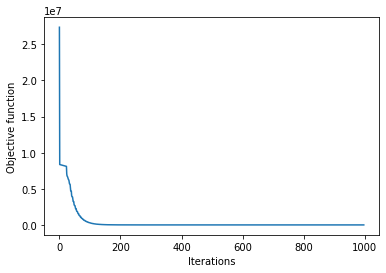

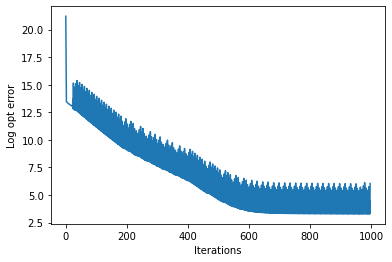

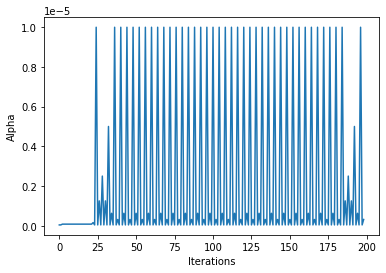

In [19]:
# Plot results showing the evolution of the algorithm

%matplotlib inline
plt.plot(OF_iter[1:i]),plt.ylabel('Objective function'),plt.xlabel('Iterations')
plt.show()

plt.plot(np.log(tol_iter[1:i])),plt.ylabel('Log opt error'),plt.xlabel('Iterations')
plt.show()

plt.plot(alpha_iter[1:200]),plt.ylabel('Alpha'),plt.xlabel('Iterations')
plt.show()

## ii. Newton's method

The iteration is given by:
$$x_{k+1} = x_k + \alpha_k\ p_k$$
where the positive scalar $\alpha_k)$ is called the step length $(\alpha_k>0)$. The success of a line search method depends on effective choices of both the direction $p_k$ and the step length $\alpha_k$. And compute a descent direction $p_k=-(\nabla^2 f(x_k))^{-1} \nabla f(x_k)$, whenever $\nabla^2 f(x_k)$ is a nonsingular matrix. 

In [35]:
# Implementation of Newton's method

(a,b) = X.shape

## Parameters for the algorithm

alpha = 1e-4
n_iter = 200 # Maximum number of iterations
epsilon = 1e-5
tol = 10000
sigma = 0.1
delta = 0.1

## Initial values for the variables and data containers

beta_lsn = np.zeros(b) # initial value for beta

OF_iter = np.zeros(n_iter)
tol_iter = np.zeros(n_iter)
alpha_iter = np.zeros(n_iter)

## Function, Gradient, Hessian evaluation number
nfev = 0
njev = 0
nhev = 0

# Implement Newton's method

time_start = time.process_time()

i = 0

while (i <= n_iter-2) and (tol > epsilon):
    i = i + 1
    grad = ridge_reg_der(beta_lsn,X,Y); njev += 1
    hess = ridge_reg_hess(beta_lsn,X,Y); nhev += 1
    ddirect = -np.dot(np.linalg.inv(hess),grad) # Descent direction
    beta_lsn = beta_lsn + ddirect
    OF_iter[i] = rigid_reg(beta_lsn, X, Y, rho); nfev += 1
    tol = np.linalg.norm(grad,ord=2)
    tol_iter[i] = tol
    alpha_iter[i] = alpha

time_elapsed = (time.process_time() - time_start)

## Print the results

print('Elapsed time = %8.5f' %(time_elapsed))
print('(This is a processing time which can be larger than actually wall time when using multiple cores)')
print('\nNumber of iterations = %5.0f' %i)
print('Objective function   = %11.5f' %OF_iter[i])
print('Optimality tolerance = %11.5f' %tol)

beta_err = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_lsn,ord=2)/np.linalg.norm(beta_lsn,ord=2)
print('\nBeta coefficient error = %10.5f' %beta_err)

print('Number of the objective function evaluations: ', nfev)
print('Number of the objective function gradient evaluations: ', njev)
print('Number of the objective function Hessian evaluations: ', nhev)

Elapsed time = 31.67188
(This is a processing time which can be larger than actually wall time when using multiple cores)

Number of iterations =     8
Objective function   = 79579.89788
Optimality tolerance =     0.00000

Beta coefficient error =    0.00000
Number of the objective function evaluations:  8
Number of the objective function gradient evaluations:  8
Number of the objective function Hessian evaluations:  8


##### Output
Elapsed time = 31.67188

Number of iterations = 8

Objective function  = 79579.89788

Optimality tolerance = 0.00

Beta coefficient error = 0.00

Function evaluation = 8

Gradient evaluation = 8

Hessian evaluation = 8

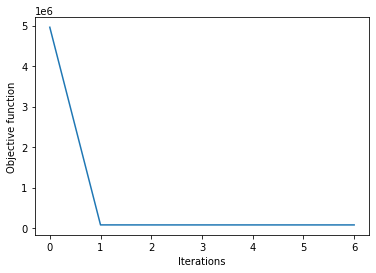

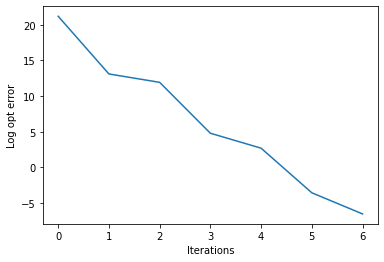

In [36]:
# Plot results showing the evolution of the algorithm

plt.plot(OF_iter[1:i]),plt.ylabel('Objective function'),plt.xlabel('Iterations')
plt.show()

plt.plot(np.log(tol_iter[1:i])),plt.ylabel('Log opt error'),plt.xlabel('Iterations')
plt.show()

## iii. Quasi-Newton Method

$$x_{k+1} = x_k + \alpha_k\ p_k$$
where $p_k=-(B_k)^{-1} \nabla f(x_k)$. As an alternative to Newton's method, $B_k$ is an approximation to the Hessian that is updated at every iteration by means of a low-rank formula. 

Therefore, the quasi-Newton method can be considered as
$$x_{k+1} = x_k - \alpha_kH_k\nabla f(x_k)$$
where $H_k$ is an approximation of $(\nabla^2 f(x_k))^{-1}$.

In [37]:
# Quasi-Newton

(a,b) = X.shape

## Parameters for the algorithm
sigma_1 = 0.001
sigma_2 = 0.9
alpha = 1e-6
delta = 0.5
n_iter = 500 # Maximum number of iterations
epsilon = 1e-3
tol = 10000

## Initial values for the variables and data containers

beta_ridge = np.zeros(b) # initial value for beta

OF_iter = np.zeros(n_iter)
tol_iter = np.zeros(n_iter)
alpha_iter = np.zeros(n_iter)


## Function, Gradient, Hessian evaluation number
nfev = 0
njev = 0
nhev = 0

# Implement the quasi-newton method
H = np.identity(K+1)

time_start = time.process_time()

i = 0

while (i <= n_iter-2) and (tol > epsilon):
    i = i + 1
    grad = ridge_reg_der(beta_ridge,X,Y); njev += 1 # Gradient vector
    ddirect = -grad # Descent direction
    p = H @ ddirect
    alpha=1e-4
    # in order to satisfy Wolfe condition
    while rigid_reg(beta_ridge + alpha * p, X, Y, rho) > rigid_reg(beta_ridge, X, Y, rho)+alpha*sigma_1*np.dot(ddirect.T, p):
        alpha = alpha*delta
        nfev += 2
    beta_ridge_old = beta_ridge
    beta_ridge = beta_ridge + alpha * H @ ddirect
    s = (alpha * H @ ddirect).reshape(-1,1)
    v = (ridge_reg_der(beta_ridge, X ,Y) - ridge_reg_der(beta_ridge_old, X, Y)).reshape(-1,1); njev += 2
    H = (np.eye(K+1) - (v @ s.T) / (v.T @ s)).T @ H @ (np.eye(K+1) - (v @ s.T) / (v.T @ s)) + (s @ s.T) / (v.T @ s)
    OF_iter[i] = rigid_reg(beta_ridge, X, Y, rho); nfev += 1
    tol = np.linalg.norm(grad,ord=2)
    tol_iter[i] = tol
    alpha_iter[i] = alpha
    if i % 1000 == 0:
        print('Iteration %d: Loss = %f' %(i, OF_iter[i]))

time_elapsed = (time.process_time() - time_start)

## Print the results

print('Elapsed time = %8.5f' %(time_elapsed))
print('(This is a processing time which can be larger than actually wall time when using multiple cores)')
print('\nNumber of iterations = %5.0f' %i)
print('Objective function   = %11.5f' %OF_iter[i])
print('Optimality tolerance = %11.5f' %tol)

beta_err = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge,ord=2)
print('\nBeta coefficient error = %10.5f' %beta_err)

print('Number of the objective function evaluations: ', nfev)
print('Number of the objective function gradient evaluations: ', njev)
print('Number of the objective function Hessian evaluations: ', nhev)

Elapsed time = 756.04688
(This is a processing time which can be larger than actually wall time when using multiple cores)

Number of iterations =   499
Objective function   = 79579.89789
Optimality tolerance =     0.77524

Beta coefficient error =    0.00000
Number of the objective function evaluations:  521
Number of the objective function gradient evaluations:  1497
Number of the objective function Hessian evaluations:  0


##### Output
Elapsed time = 756.04688

Number of iterations = 499

Objective function = 79579.89789

Optimality tolerance = 0.77524

Beta coefficient error = 0.00000

Function evaluation = 521

Gradient evaluation = 1497

Hessian evaluation = 0

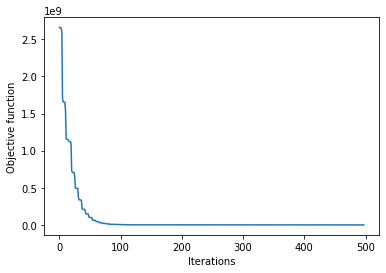

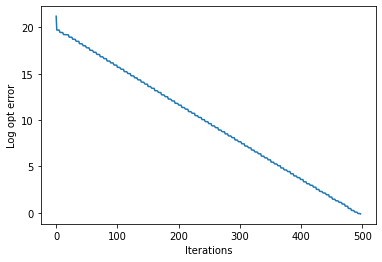

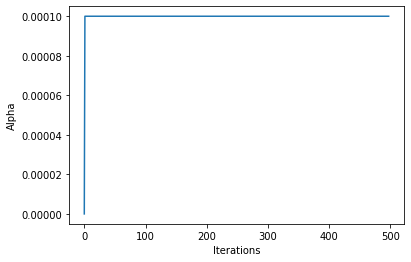

In [38]:
# Plot results showing the evolution of the algorithm

plt.plot(OF_iter[1:i]),plt.ylabel('Objective function'),plt.xlabel('Iterations')
plt.show()

plt.plot(np.log(tol_iter[1:i])),plt.ylabel('Log opt error'),plt.xlabel('Iterations')
plt.show()

plt.plot(alpha_iter[1:i]),plt.ylabel('Alpha'),plt.xlabel('Iterations')
plt.show()

| Algorithm        | Iteration | Function eval | Gradient eval | Hessian evaluation | Training time | Beta error |
|------------------|-----------|---------------|---------------|--------------------|---------------|------------|
| Gradient Descent | 999       | 11311         | 999           | 0                  | 1796.92188 s  | 0.00806    |
| Newton Method    | 8         | 8             | 8             | 8                  | 31.67188 s    | 0.0000     |
| Quasi-Newton     | 499       | 521           | 1497          | 0                  | 756.04688 s   | 0.0000     |

From the performance of each algorithm, we can clearly see that newton method has the best performance. After 8 iterations, the beta_error becomes zero. It has the shortest training time plus the least iteration number.

Quasi-Newtion also has impressive performance. After about 500 iterations, the beta error also becomes zero. Because of higher iteration number, it takes more training time compared to Newton Method.

Gradient Decent costs more times and need more iterations for convergence. The beta error is also low after 1000 iterations.



# e)
Estimate the value of the regression coefficients of (1) by implementing the *
1. **Coordinate descent** Method
2. **Stochastic gradient** Method
3. Three other techniques presentaed in Topic 2

Compare the performance of these algorithms (number of iterations, function, gradient and hessian evaluations, and total computational time).


## i. Coordinate descent Method

In [58]:
#Descenso por coordenadas
import time
(a, b) = X.shape

def rigid_reg_der_k(beta_ridge,k, X, Y):
    # beta_ridge has the dimension of (K+1,)
    # X has the dimension of (N, K+1)
    # Y has the dimenstion of (N, )

    pp = -2*np.dot((Y - X @ beta_ridge).T,X[:, k])
    aa = pp.squeeze() + 2 * rho * beta_ridge[k]
    return aa

niter = 15000
epsilon = 1e-6
i = 0
alpha = 1e-4
delta = 0.1
sigma = 0.1
OF_iter_cur = 0
tol_iter = np.zeros(niter)
error_coord_iter = []
tol = 10
beta_coord = np.zeros(b)

## Function, Gradient, Hessian evaluation number
nfev = 0
njev = 0
nhev = 0

time_start = time.process_time()

while (i < niter) and (tol > epsilon):
    k = np.random.randint(b)
    grad_k = rigid_reg_der_k(beta_coord,k,X,Y); njev += 1
    grad = np.zeros(b)
    grad[k] = grad_k
    ddirect = -grad
    ##### Armijo rule to adjust alpha ######
    alpha=1e-8
    while rigid_reg(beta_coord + alpha * ddirect, X, Y, rho) > rigid_reg(beta_coord, X, Y, rho)+alpha*sigma*np.dot(ddirect, grad):
        alpha = alpha*delta
        nfev += 2
    #########################################
    beta_coord = beta_coord + alpha*ddirect
    tol = np.linalg.norm(grad, ord = 2)
    tol_iter[i] = tol
    error_coord_iter.append(np.linalg.norm(np.transpose(beta_ridge_exact) - beta_coord.T, ord = 2)/np.linalg.norm(beta_ridge_exact, ord = 2))
    if i % 1000 == 0:
        print('Iteration %d: Beta_err = %f' %(i, error_coord_iter[i]))
    i +=1


time_elapsed = (time.process_time() - time_start)
print('time elapsed =',time_elapsed)
print('number iterations =',i)
print('tolerance=',tol)
print('error', np.linalg.norm(np.transpose(beta_ridge_exact) - beta_coord.T, ord = 2)/np.linalg.norm(beta_ridge_exact, ord = 2))

print('Number of the objective function evaluations: ', nfev)
print('Number of the objective function gradient evaluations: ', njev)
print('Number of the objective function Hessian evaluations: ', nhev)

Iteration 0: Beta_err = 1.000022
Iteration 1000: Beta_err = 0.877759
Iteration 2000: Beta_err = 0.797484
Iteration 3000: Beta_err = 0.741249
Iteration 4000: Beta_err = 0.700624
Iteration 5000: Beta_err = 0.678937
Iteration 6000: Beta_err = 0.661967
Iteration 7000: Beta_err = 0.653206
Iteration 8000: Beta_err = 0.648701
Iteration 9000: Beta_err = 0.646157
Iteration 10000: Beta_err = 0.644630
Iteration 11000: Beta_err = 0.642871
Iteration 12000: Beta_err = 0.642436
Iteration 13000: Beta_err = 0.641768
Iteration 14000: Beta_err = 0.641396
time elapsed = 5770.25
number iterations = 15000
tolerance= 1177435.1195944832
error 0.6408917470716439
Number of the objective function evaluations:  0
Number of the objective function gradient evaluations:  15000
Number of the objective function Hessian evaluations:  0


##### Output

time elapsed = 5770.25 s

number iterations = 15000

error 0.6408

Function evaluation = 0

Gradient evaluation = 15000

Hessian evaluation = 0

## ii. Stochastic gradient

In [87]:
def rigid_reg_stoc(beta_ridge, X, Y, subset):
    Xsub = X[subset,:]
    Ysub = Y[subset]
    z = Ysub - Xsub @ beta_ridge
    return np.dot(z.T,z) + rho * np.dot(beta_ridge.T, beta_ridge)

def ridge_reg_der_stoc(beta_ridge,X,Y,subset):
    Xsub = X[subset,:]
    Ysub = Y[subset]

    pp = -2*np.dot((Ysub - Xsub @ beta_ridge).T,Xsub)
    aa = pp.squeeze() + 2 * rho * beta_ridge
    return aa

(a,b)=X.shape
beta_ridge=np.zeros(b) #initial value for beta
alpha=1e-6
n_iter=300000 #maximim number iteration
OF_iter_cur= 0
OF_iter_pre = 0
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
error_minib_iter=np.zeros(n_iter)
i=0
sigma = 0.001
#### Number of samples to take into consideration in each iteration
subsetsize = 1

## Function, Gradient, Hessian evaluation number
nfev = 0
njev = 0
nhev = 0

time_start = time.process_time()

while i <= n_iter-2:
    subset = np.random.choice(N, subsetsize, replace=False)
    grad = ridge_reg_der_stoc(beta_ridge, X, Y, subset); njev += 1
    ddirect = -grad
    ##### Armijo rule to adjust alpha ######
    alpha=1e-6
    while rigid_reg_stoc(beta_ridge + alpha * ddirect, X, Y, subset) > rigid_reg_stoc(beta_ridge, X, Y,subset)+alpha*sigma*np.dot(ddirect, grad):
        alpha = alpha*delta
        nfev += 2
    #########################################
    beta_ridge = beta_ridge + alpha * ddirect
    OF_iter_cur = rigid_reg_stoc(beta_ridge, X, Y, subset); nfev += 1
    error_minib_iter[i] = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge,ord=2)
    if i % 1000 == 0:
        print('Iteration %d: Loss = %f Beta_err = %f' %(i, OF_iter_cur, error_minib_iter[i]))
    i=i+1

time_elapsed = (time.process_time() - time_start)
print('time elapsed =',time_elapsed)
print('iterations =',i)
print('Objective Function value =', OF_iter_cur)
print('Betas =',beta_ridge)
print('error=',np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge,ord=2))

print('Number of the objective function evaluations: ', nfev)
print('Number of the objective function gradient evaluations: ', njev)
print('Number of the objective function Hessian evaluations: ', nhev)

Iteration 0: Loss = 1073877.675574 Beta_err = 1993.155507
Iteration 1000: Loss = 401860.260318 Beta_err = 2.339069
Iteration 2000: Loss = 146850.625482 Beta_err = 1.248808
Iteration 3000: Loss = 66620.050025 Beta_err = 0.947948
Iteration 4000: Loss = 47255.685847 Beta_err = 0.827911
Iteration 5000: Loss = 28291.907857 Beta_err = 0.772103
Iteration 6000: Loss = 28235.327370 Beta_err = 0.743192
Iteration 7000: Loss = 22503.153029 Beta_err = 0.727298
Iteration 8000: Loss = 21133.118178 Beta_err = 0.718425
Iteration 9000: Loss = 21396.131165 Beta_err = 0.713062
Iteration 10000: Loss = 19667.994296 Beta_err = 0.709565
Iteration 11000: Loss = 20148.619430 Beta_err = 0.707912
Iteration 12000: Loss = 20093.009567 Beta_err = 0.706732
Iteration 13000: Loss = 19959.596925 Beta_err = 0.705773
Iteration 14000: Loss = 21236.397530 Beta_err = 0.705184
Iteration 15000: Loss = 20097.000038 Beta_err = 0.704853
Iteration 16000: Loss = 21328.281859 Beta_err = 0.704688
Iteration 17000: Loss = 19872.493749 

##### Output

time elapsed = 345.53125

iterations = 299999

error= 0.6952

Function evaluation = 299999

Gradient evaluation = 299999

Hessian evaluation = 0


## iii. Others Techniques
We will use three other techniques presented in Topic 2 (one from each category: "noise reduction", "second-order" and "others" mothods).

### Noise Reduction
We want to implement Dynamic Sample Size Method.

The key points of this method is to gradually increase the minibatch size.


In [56]:

def rigid_reg_stoc(beta_ridge, X, Y, subset):
    Xsub = X[subset,:]
    Ysub = Y[subset]
    z = Ysub - Xsub @ beta_ridge
    return np.dot(z.T,z) + rho * np.dot(beta_ridge.T, beta_ridge)

def ridge_reg_der_stoc(beta_ridge,X,Y,subset):
    Xsub = X[subset,:]
    Ysub = Y[subset]

    pp = -2*np.dot((Ysub - Xsub @ beta_ridge).T,Xsub)
    aa = pp.squeeze() + 2 * rho * beta_ridge
    return aa

(a,b)=X.shape
beta_ridge=np.zeros(b) #initial value for beta
n_iter=60000 #maximim number iteration
OF_iter_cur = 0
alpha_iter=np.zeros(n_iter)
error_minib_iter=np.zeros(n_iter)
i=0
epsilon=1e-6
delta = 0.2
tau = 1.0001
subsetsize = 1

## Function, Gradient, Hessian evaluation number
nfev = 0
njev = 0
nhev = 0

time_start = time.process_time()

while i <= n_iter-2:
    #### Number of samples to take into consideration in each iteration

    subsetsize_trunc = min(int(subsetsize),a)
    subset = np.random.choice(N, subsetsize_trunc, replace=False)
    grad = ridge_reg_der_stoc(beta_ridge, X, Y, subset); njev += 1
    ddirect = -grad
    ##### Armijo rule to adjust alpha ######
    alpha=1e-4
    while rigid_reg_stoc(beta_ridge + alpha * ddirect, X, Y, subset) > rigid_reg_stoc(beta_ridge, X, Y,subset)+alpha*sigma*np.dot(ddirect, grad):
        alpha = alpha*delta
        nfev += 2
    #########################################
    beta_ridge = beta_ridge + alpha * ddirect
    OF_iter_cur = rigid_reg_stoc(beta_ridge, X, Y, subset); nfev += 1
    error_minib_iter[i] = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge,ord=2)
    if i % 100 == 0:
        print('Iteration %d: Loss = %f, minibatch_size = %d Beta_error = %f' %(i, OF_iter_cur, subsetsize_trunc, error_minib_iter[i]))
    i=i+1
    subsetsize *= tau

time_elapsed = (time.process_time()- time_start)
print('time elapsed =',time_elapsed)
print('iterations =',i)
print('Objective Function value =', OF_iter_cur)
print('Betas =',beta_ridge)
print('error=',np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge,ord=2))

print('Number of the objective function evaluations: ', nfev)
print('Number of the objective function gradient evaluations: ', njev)
print('Number of the objective function Hessian evaluations: ', nhev)

Iteration 0: Loss = 933453.847914, minibatch_size = 1 Beta_error = 19.600272
Iteration 100: Loss = 20350.007893, minibatch_size = 1 Beta_error = 0.718240
Iteration 200: Loss = 19869.009753, minibatch_size = 1 Beta_error = 0.713517
Iteration 300: Loss = 19892.342056, minibatch_size = 1 Beta_error = 0.710915
Iteration 400: Loss = 20251.133391, minibatch_size = 1 Beta_error = 0.707615
Iteration 500: Loss = 20378.075293, minibatch_size = 1 Beta_error = 0.706876
Iteration 600: Loss = 20356.783543, minibatch_size = 1 Beta_error = 0.704129
Iteration 700: Loss = 20263.417086, minibatch_size = 1 Beta_error = 0.704826
Iteration 800: Loss = 19851.637354, minibatch_size = 1 Beta_error = 0.704084
Iteration 900: Loss = 21004.335586, minibatch_size = 1 Beta_error = 0.702669
Iteration 1000: Loss = 19890.234591, minibatch_size = 1 Beta_error = 0.702753
Iteration 1100: Loss = 20564.991952, minibatch_size = 1 Beta_error = 0.703310
Iteration 1200: Loss = 21116.939835, minibatch_size = 1 Beta_error = 0.701

##### Output

time elapsed = 139.21875

iterations = 59999

error= 0.0847

Function evaluation = 102077

Gradient evaluation = 599999

Hessian evaluation = 0

### Second Order Methods: Stochastic Quasi-Newton

In [57]:
# Stochastic-Quasi-Newton
def rigid_reg_stoc(beta_ridge, X, Y, subset):
    Xsub = X[subset,:]
    Ysub = Y[subset]
    z = Ysub - Xsub @ beta_ridge
    return np.dot(z.T,z) + rho * np.dot(beta_ridge.T, beta_ridge)

def ridge_reg_der_stoc(beta_ridge,X,Y,subset):
    Xsub = X[subset,:]
    Ysub = Y[subset]

    pp = -2*np.dot((Ysub - Xsub @ beta_ridge).T,Xsub)
    aa = pp.squeeze() + 2 * rho * beta_ridge
    return aa

(a,b) = X.shape

## Parameters for the algorithm
sigma_1 = 0.0001
sigma_2 = 0.9
alpha = 1e-6
delta = 0.1
n_iter = 20000 # Maximum number of iterations
epsilon = 1e-3
tol = 10000

beta_ridge = np.zeros(b) # initial value for beta

OF_iter = np.zeros(n_iter)
tol_iter = np.zeros(n_iter)
alpha_iter = np.zeros(n_iter)

## Function, Gradient, Hessian evaluation number
nfev = 0
njev = 0
nhev = 0

# Implement the quasi-newton method
H = np.identity(K+1)

time_start = time.process_time()

i = 0
subsetsize = 512

while (i <= n_iter-2) and (tol > epsilon):
    i = i + 1
    subset = np.random.choice(N, subsetsize, replace=False)
    grad = ridge_reg_der_stoc(beta_ridge,X,Y, subset); njev += 1 # Gradient vector
    ddirect = -grad # Descent direction
    p = H @ ddirect
    alpha=2e-3
    # in order to satisfy Wolfe condition
    while rigid_reg_stoc(beta_ridge + alpha * p, X, Y, subset) > rigid_reg_stoc(beta_ridge, X, Y, subset)+alpha*sigma_1*np.dot(ddirect.T, p):
        alpha = alpha*delta
        nfev += 2
    beta_ridge_old = beta_ridge
    beta_ridge = beta_ridge + alpha * H @ ddirect
    s = (alpha * H @ ddirect).reshape(-1,1)
    v = (ridge_reg_der_stoc(beta_ridge, X ,Y, subset) - ridge_reg_der_stoc(beta_ridge_old, X, Y, subset)).reshape(-1,1); njev += 2
    H = (np.eye(K+1) - (v @ s.T) / (v.T @ s)).T @ H @ (np.eye(K+1) - (v @ s.T) / (v.T @ s)) + (s @ s.T) / (v.T @ s)
    OF_iter[i] = rigid_reg_stoc(beta_ridge, X, Y, subset); nfev += 1
    tol = np.linalg.norm(grad,ord=2)
    tol_iter[i] = tol
    alpha_iter[i] = alpha
    beta_err = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge,ord=2)
    if i % 100 == 0:
        print('Iteration %d: Loss = %f, Beta_err = %f' %(i, OF_iter[i], beta_err))

time_elapsed = (time.process_time() - time_start)

## Print the results

print('Elapsed time = %8.5f' %(time_elapsed))
print('(This is a processing time which can be larger than actually wall time when using multiple cores)')
print('\nNumber of iterations = %5.0f' %i)
print('Objective function   = %11.5f' %OF_iter[i])
print('Optimality tolerance = %11.5f' %tol)

beta_err = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge,ord=2)
print('\nBeta coefficient error = %10.5f' %beta_err)

print('Number of the objective function evaluations: ', nfev)
print('Number of the objective function gradient evaluations: ', njev)
print('Number of the objective function Hessian evaluations: ', nhev)

Iteration 100: Loss = 52577740.301835, Beta_err = 0.997695
Iteration 200: Loss = 32273017.846336, Beta_err = 0.996544
Iteration 300: Loss = 60814587.973162, Beta_err = 0.996777
Iteration 400: Loss = 39831275.982504, Beta_err = 0.997547
Iteration 500: Loss = 63939297.640966, Beta_err = 0.998223
Iteration 600: Loss = 51455050.141600, Beta_err = 0.997638
Iteration 700: Loss = 50058553.164595, Beta_err = 0.996643
Iteration 800: Loss = 59054248.890011, Beta_err = 0.996166
Iteration 900: Loss = 49636860.957581, Beta_err = 0.995301
Iteration 1000: Loss = 45876351.369441, Beta_err = 0.996602
Iteration 1100: Loss = 52985475.854338, Beta_err = 0.995936
Iteration 1200: Loss = 49612951.346746, Beta_err = 0.995749
Iteration 1300: Loss = 46684058.529307, Beta_err = 0.995469
Iteration 1400: Loss = 32446608.049308, Beta_err = 0.994683
Iteration 1500: Loss = 29750640.286010, Beta_err = 0.993284
Iteration 1600: Loss = 20257752.861877, Beta_err = 0.991463
Iteration 1700: Loss = 17429057.241136, Beta_err 

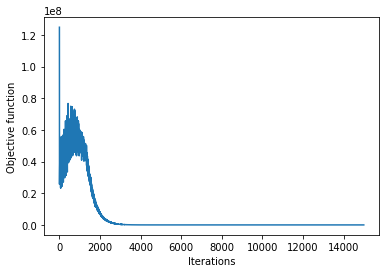

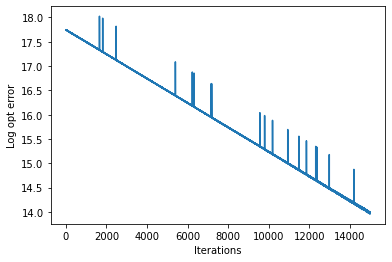

In [59]:
plt.plot(OF_iter[1:i]),plt.ylabel('Objective function'),plt.xlabel('Iterations')
plt.show()

plt.plot(np.log(tol_iter[1:i])),plt.ylabel('Log opt error'),plt.xlabel('Iterations')
plt.show()

##### Output

time elapsed = 7592.15625

iterations = 19999

error= 0.09918

Function evaluation = 20005

Gradient evaluation = 59997

Hessian evaluation = 0

### Others

In [85]:
# Momentum

def rigid_reg_stoc(beta_ridge, X, Y, subset):
    Xsub = X[subset,:]
    Ysub = Y[subset]
    z = Ysub - Xsub @ beta_ridge
    return np.dot(z.T,z) + rho * np.dot(beta_ridge.T, beta_ridge)

def ridge_reg_der_stoc(beta_ridge,X,Y,subset):
    Xsub = X[subset,:]
    Ysub = Y[subset]

    pp = -2*np.dot((Ysub - Xsub @ beta_ridge).T,Xsub)
    aa = pp.squeeze() + 2 * rho * beta_ridge
    return aa

(a,b)=X.shape
beta_ridge_cur=np.zeros(b) #initial value for beta
beta_ridge_pre=np.zeros(b)
alpha=1e-5
n_iter=100000 #maximim number iteration
OF_iter_cur= 0
OF_iter_pre = 0
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
error_minib_iter=np.zeros(n_iter)
i=0
sigma = 0.01
#### Number of samples to take into consideration in each iteration
subsetsize = 256
b = 0.5

## Function, Gradient, Hessian evaluation number
nfev = 0
njev = 0
nhev = 0

time_start = time.process_time()

while i <= n_iter-2:
    subset = np.random.choice(N, subsetsize, replace=False)
    if i >= 2:
        beta_ridge_tmp = beta_ridge_cur + b * (beta_ridge_cur - beta_ridge_pre)
        grad = ridge_reg_der_stoc(beta_ridge_tmp, X, Y, subset); njev += 1
        beta_ridge_pre = beta_ridge_cur
        beta_ridge_cur = beta_ridge_tmp - alpha * grad

    else:
        grad = ridge_reg_der_stoc(beta_ridge, X, Y, subset); njev += 1
        ddirect = -grad
        tmp = beta_ridge_cur
        beta_ridge_cur = beta_ridge_cur + alpha * ddirect
        beta_ridge_pre = tmp

    OF_iter_cur = rigid_reg_stoc(beta_ridge_cur, X, Y, subset); nfev += 1
    error_minib_iter[i] = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge_cur,ord=2)/np.linalg.norm(beta_ridge_cur,ord=2)
    if i % 1000 == 0:
        print('Iteration %d: Loss = %f Beta_err = %f' %(i, OF_iter_cur, error_minib_iter[i]))
    i=i+1

time_elapsed = (time.process_time() - time_start)
print('time elapsed =',time_elapsed)
print('iterations =',i)
print('Objective Function value =', OF_iter_cur)
print('Betas =',beta_ridge)
print('error=',np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge_cur,ord=2)/np.linalg.norm(beta_ridge_cur,ord=2))

print('Number of the objective function evaluations: ', nfev)
print('Number of the objective function gradient evaluations: ', njev)
print('Number of the objective function Hessian evaluations: ', nhev)

Iteration 0: Loss = 265792359.271785 Beta_err = 542.157203
Iteration 1000: Loss = 33182.025849 Beta_err = 0.312556
Iteration 2000: Loss = 29247.570014 Beta_err = 0.182354
Iteration 3000: Loss = 28972.767602 Beta_err = 0.139488
Iteration 4000: Loss = 28793.148119 Beta_err = 0.124627
Iteration 5000: Loss = 28893.035992 Beta_err = 0.119505
Iteration 6000: Loss = 28817.959335 Beta_err = 0.117448
Iteration 7000: Loss = 28796.783577 Beta_err = 0.116599
Iteration 8000: Loss = 28929.272090 Beta_err = 0.116334
Iteration 9000: Loss = 28948.695124 Beta_err = 0.116198
Iteration 10000: Loss = 28819.801233 Beta_err = 0.115775
Iteration 11000: Loss = 28984.525851 Beta_err = 0.116081
Iteration 12000: Loss = 28892.788139 Beta_err = 0.115850
Iteration 13000: Loss = 28740.713792 Beta_err = 0.116055
Iteration 14000: Loss = 28846.621211 Beta_err = 0.115666
Iteration 15000: Loss = 28631.908623 Beta_err = 0.116133
Iteration 16000: Loss = 29005.009351 Beta_err = 0.115849
Iteration 17000: Loss = 29200.843042 B

##### Output

time elapsed = 299.8125

iterations = 99999

error= 0.1163

Function evaluation = 99999

Gradient evaluation = 99999

Hessian evaluation = 0

| Algorithm               | Iteration | Function eval | Gradient eval | Hessian eval | Batch size | Training time | Beta error |
|-------------------------|-----------|---------------|---------------|--------------|------------|---------------|------------|
| Coordinate descent      | 15000     | 0             | 15000         | 0            | 50000      | 5937.90625 s  | 0.6408     |
| SGD(vanilla)            | 299999    | 299999        | 299999        | 0            | 1          | 345.53125 s   | 0.6952     |
| SGD(noise reduction)    | 59999     | 102077        | 59999         | 0            | not fixed  | 139.21875 s   | 0.0847     |
| Stochastic Quasi-Newton | 19999     | 20005         | 59997         | 0            | 512        | 7592.15625 s  | 0.0992     |
| SGD (Momentum)          | 19999     | 19999         | 19999         | 0            | 256        | 299.8125 s    | 0.1163     |

### Conclusions
As we can see from the results, the Coordinate descent and SGD (vanilla) cannot successfully solve the task. It doesn't converge even after long training time. The SGD (vanilla) is faster than Coordinate descent since it has smaller batch size.

We implemented one of the methods in categories noise reduction, second-order and momentum.
1. noise reduction:
We gradually increase the mini-batch size in order to get a faster convergence rate. The result shows that it does converge faster than vanilla stochastic gradient descent, and have smaller beta evaluation error. This method is very useful because the dynamic mini-batch size ensure the shorter training time and lower beta error at the same time.
2. second-order:
We chose stochastic quasi-newton method. We chose a larger batch size because second-order method is more sensitive to batch size compare to gradient method. If the batch size is chosen too small, it may not converge anymore. The result show that it does converge to a relative small beta evaluation error. However, it needs more iterations and causes more training time.
3. other:
We took momentum as our first choice. After around 20000 iterations, the beta error to 0.1163 and the training time is shorter because it has smaller mini-batch size.

# f）
Consider the constrained problem:

\begin{align*}
  \min_\beta \quad & \|y-X\beta\|^2_2 \\
  s.t. \sum_{i=1}^{K} \beta_i \leq 100
\end{align*}

Estimate optimal value of the regression coefficients in (2) by implementing a barrier algorithm.*

*You have to write down the algorithms’ code in Python by yourself.


To optimize the following problem,
\begin{align*}
  \text{minimize}_\beta \quad & \|y-X\beta\|^2_2 \\
  s.t. \sum_{i=1}^{K} \beta_i \leq 100
\end{align*}
we implemented some transformations first. We will get
\begin{align*}
  \text{minimize}_\beta \quad & \|y-X\beta\|^2_2 \\
  s.t. 100 - \sum_{i=1}^{K} \beta_i \geq 0
\end{align*}
After apply barrier algorithm, the above optimization problem can be approximately seen as the following unconstraint problem:
\begin{align*}
  \text{minimize}_\beta \quad & \|y-X\beta\|^2_2 - \mu log (100 - \sum_{i=1}^{K} \beta_i)\\
\end{align*}

In [30]:
mu = 100 # Hyper parameters
def reg(beta, X, Y):
    z = Y - X @ beta
    return np.dot(z.T,z) - mu * np.log(100 - np.sum(beta))


def reg_der(beta,X,Y):

    pp = -2*np.dot((Y - X @ beta).T,X)
    aa = pp.squeeze() + mu * beta / (100 - np.sum(beta))
    return aa

(a,b)=X.shape
beta_cur=np.zeros(b) #initial value for beta
beta_pre=np.zeros(b)
alpha=1e-8
n_iter=1000 #maximim number iteration
OF_iter_cur= 0
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
error_minib_iter=np.zeros(n_iter)
i=0
sigma = 0.01
#### Number of samples to take into consideration in each iteration
subsetsize = 128
b = 0.1

time_start = time.time()

while i <= n_iter-2:
    subset = np.random.choice(N, subsetsize, replace=False)
    grad = reg_der(beta_ridge, X, Y)
    ddirect = -grad
    alpha = 1e-7
    while np.sum(beta_cur + alpha * ddirect) >= 100:
        alpha = alpha * 0.5
    beta_cur = beta_cur + alpha * ddirect
    OF_iter_cur = reg(beta_cur, X, Y)
    # error_minib_iter[i] = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge_cur,ord=2)
    if i % 100 == 0:
        print('Iteration %d: Loss = %f' %(i, OF_iter_cur))
    i=i+1

time_elapsed = (time.time() - time_start)
print('time elapsed =',time_elapsed)
print('iterations =',i)
print('Objective Function value =', OF_iter_cur)
print('Betas =',beta_cur)
print('Sum of Beta =', np.sum(beta_cur))

Iteration 0: Loss = 51869399264.771751
Iteration 100: Loss = 50034139819.622498
Iteration 200: Loss = 48231936015.025299
Iteration 300: Loss = 46908881404.231438
Iteration 400: Loss = 46908881404.231438
Iteration 500: Loss = 46908881404.231438
Iteration 600: Loss = 46908881404.231438
Iteration 700: Loss = 46908881404.231438
Iteration 800: Loss = 46908881404.231438
Iteration 900: Loss = 46908881404.231438
time elapsed = 66.41316437721252
iterations = 999
Objective Function value = 46908881404.23144
Betas = [0.19840027 0.01842587 0.09756688 ... 0.02077829 0.13997541 0.17517204]
Sum of Beta = 99.99999999999999


The intuition of barrier algorithm is very simple. It leverages that the gradient of log near 0 is quite steep which enforce the constraints of the optimization problem to be satisfied. As we can see from the results, the sum of beta is smaller than 100 after we use barrier algorithm.

Note that the sum of the true beta vector is far larger than 100. The constraint of this optimization problem causes relative high loss.

2034